## The Illustrated BERT, ELMo, and co. (How NLP Cracked破解 Transfer Learning)

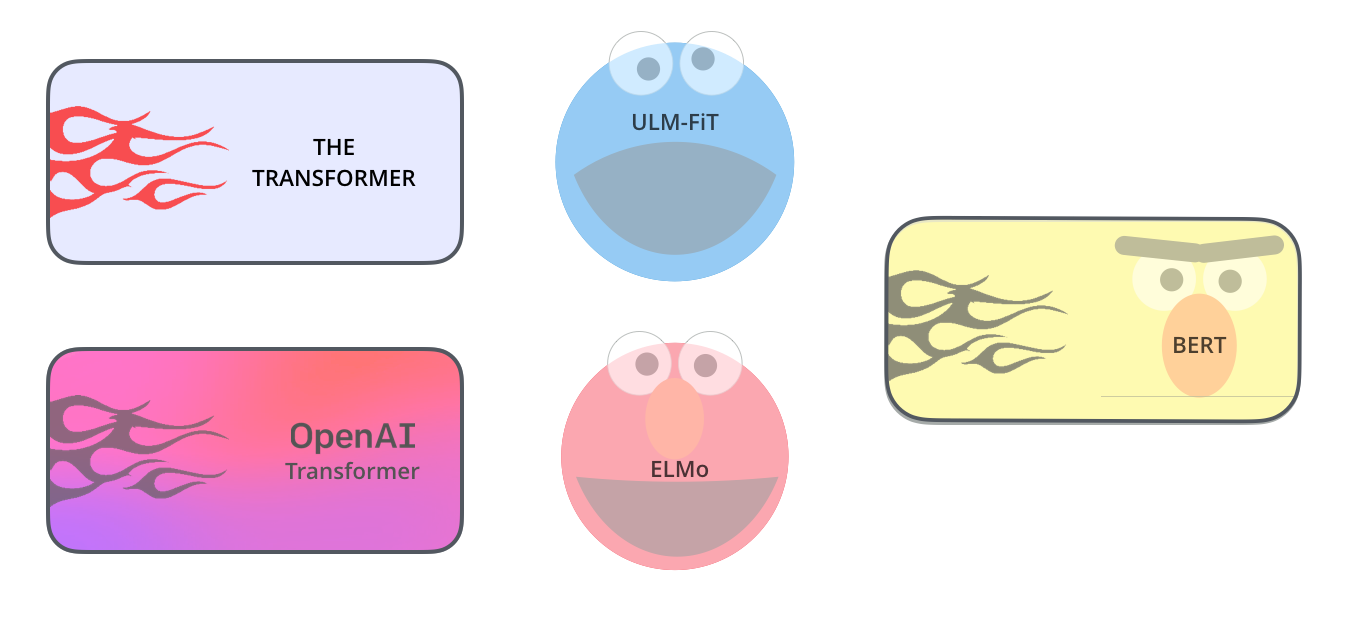

上图中，最新发布的BERT是一个NLP任务的里程碑式模型，它的发布势必会带来一个NLP的新时代。BERT是一个算法模型，它的出现打破了大量的自然语言处理任务的记录。在BERT的论文发布不久后，Google的研发团队还开放了该模型的代码，并提供了一些在大量数据集上预训练好的算法模型下载方式。Goole开源这个模型，并提供预训练好的模型，这使得所有人都可以通过它来构建一个涉及NLP的算法模型，节约了大量训练语言模型所需的时间，精力，知识和资源。

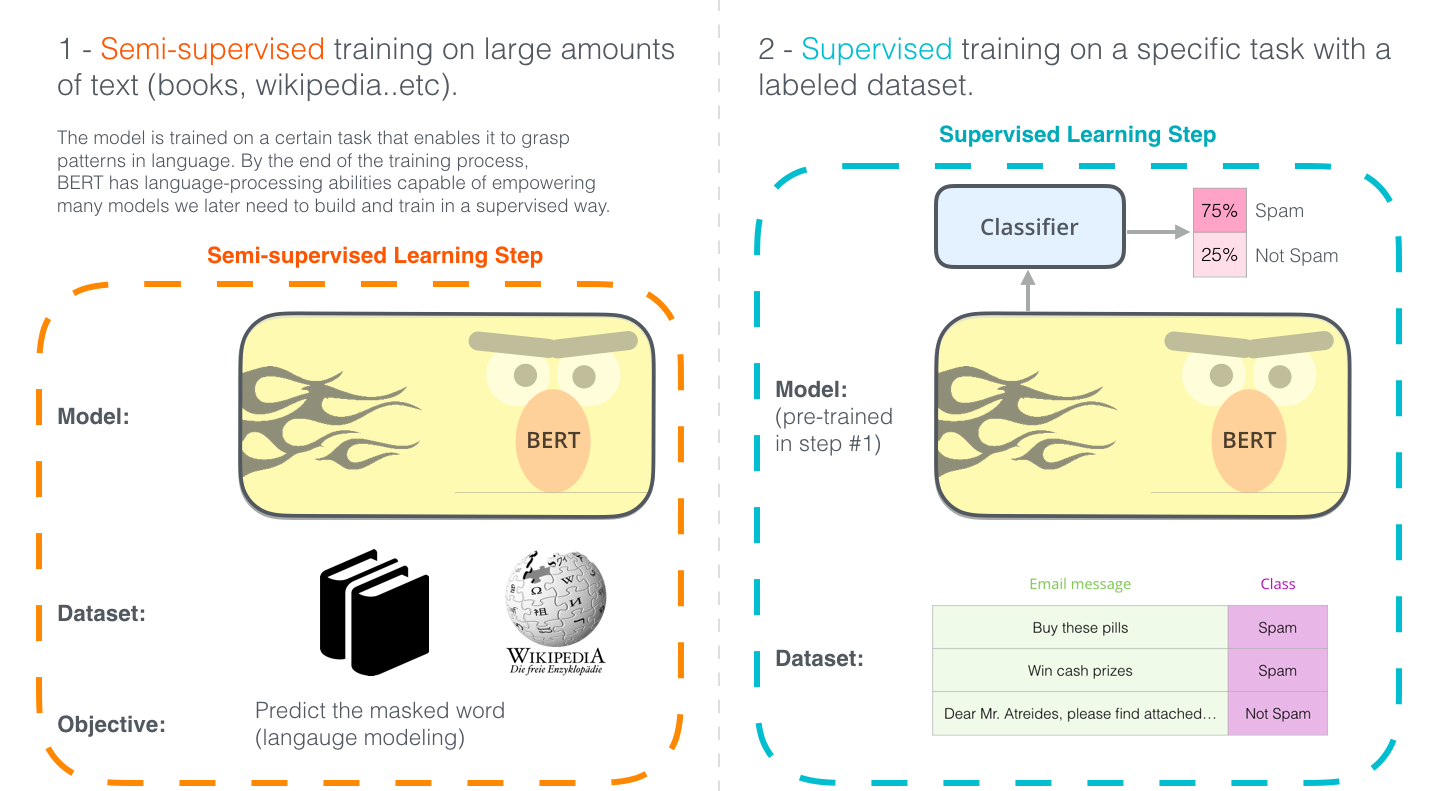

人们需要了解许多概念才能正确地理解 BERT 是什么。因此，在查看模型本身所涉及的概念之前，让我们先看看使用 BERT 的方法。

### Example: Sentence Classification

The most straight-forward way to use BERT is to use it to classify a single piece of text. This model would look like this:

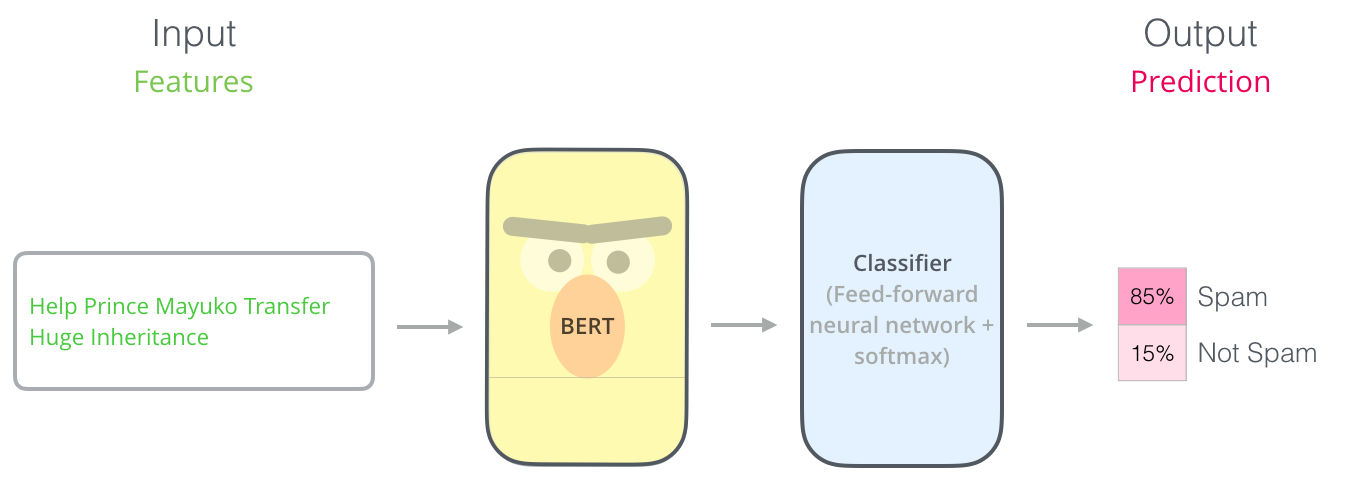

为了训练一个这样的模型，（主要是训练一个分类器），在训练阶段BERT模型发生的变化很小。该训练过程称为微调  

为了更方便理解，我们下面举一个分类器的例子。分类器是属于监督学习领域的，这意味着你需要一些标记的数据来训练这些模型。对于垃圾邮件分类器的示例，标记的数据集由邮件的内容和邮件的类别2部分组成（类别分为“垃圾邮件”或“非垃圾邮件”）。

Other examples for such a use-case include:

* **Sentiment analysis**
    * Input: Movie/Product review. Output: is the review positive or negative?
    * Example dataset: SST

* **Fact-checking(事实核查)** 
    * Input: sentence. Output: “Claim(索赔)” or “Not Claim”
    * More ambitious/futuristic example:
        * Input: Claim sentence. Output: “True” or “False”

### Model Architecture

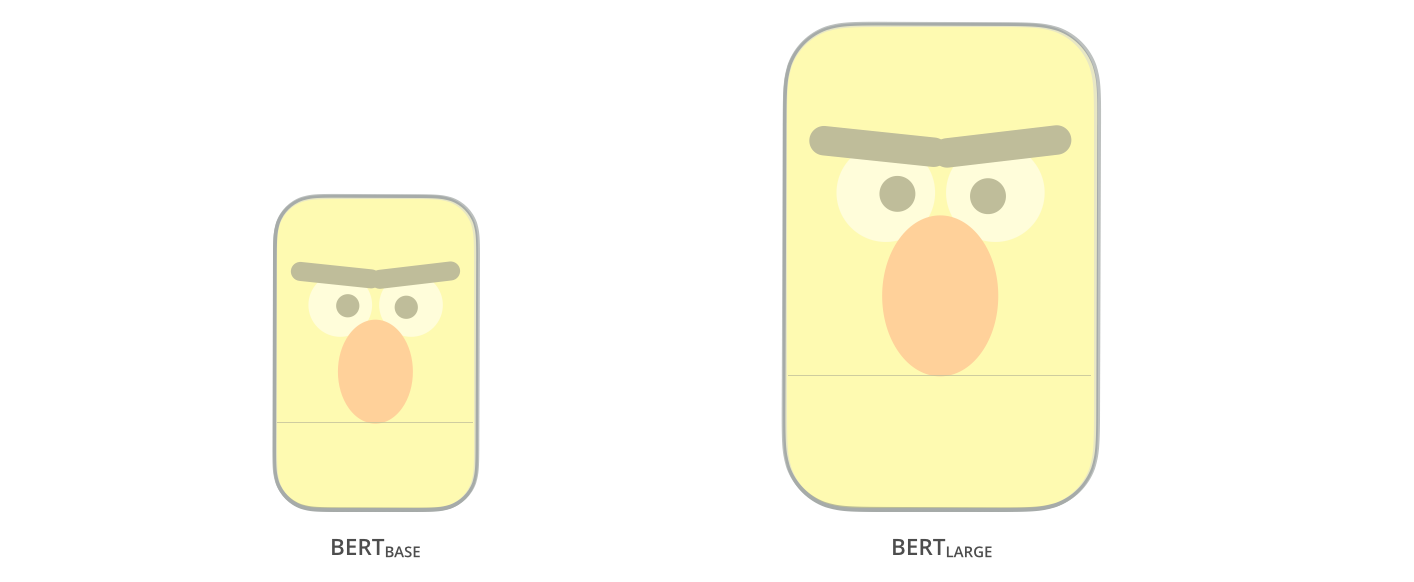

The paper presents two model sizes for BERT:

* BERT BASE – Comparable in size to the OpenAI Transformer in order to compare performance     
* BERT LARGE – A ridiculously huge model which achieved the state of the art results reported in the paper     

BERT is basically a trained Transformer Encoder stack. This is a good time to direct you to read my earlier post The Illustrated Transformer which explains the [Transformer model]() – a foundational concept for BERT and the concepts we’ll discuss next.

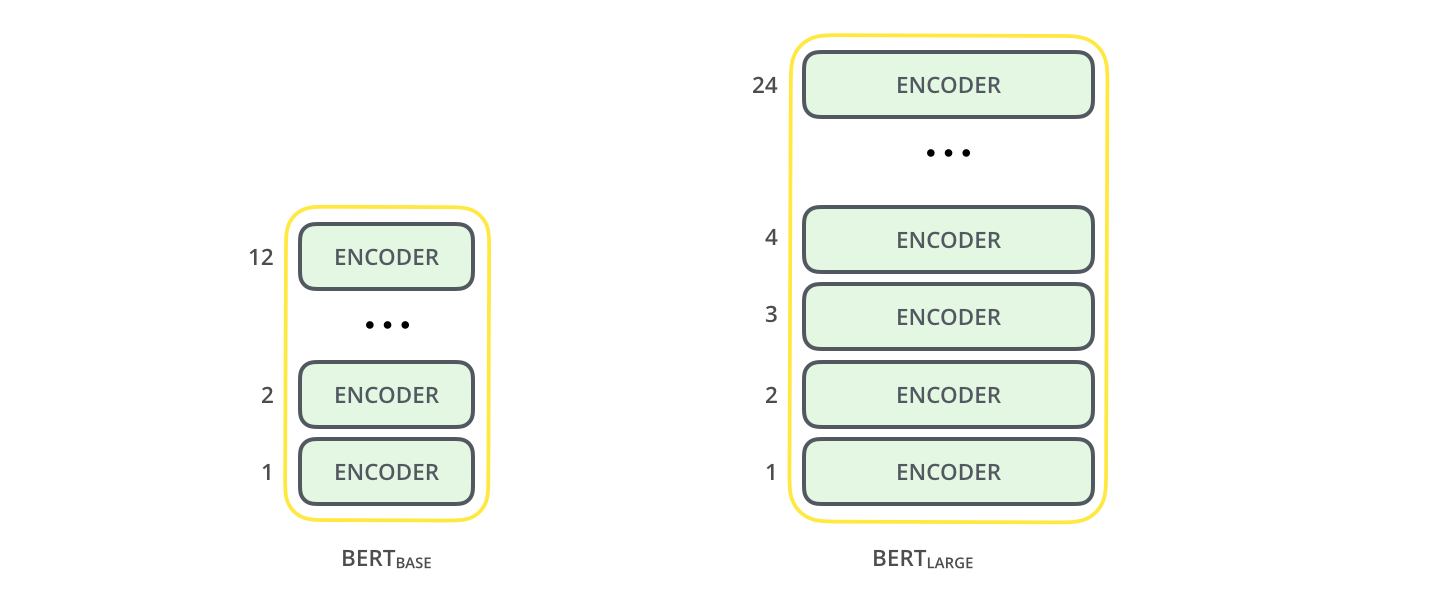

Both BERT model sizes have a large number of encoder layers (which the paper calls Transformer Blocks) – twelve for the Base version, and twenty four for the Large version. These also have larger feedforward-networks (768 and 1024 hidden units respectively), and more attention heads (12 and 16 respectively) than the default configuration in the reference implementation of the Transformer in the initial paper (6 encoder layers, 512 hidden units, and 8 attention heads).

### Model Inputs

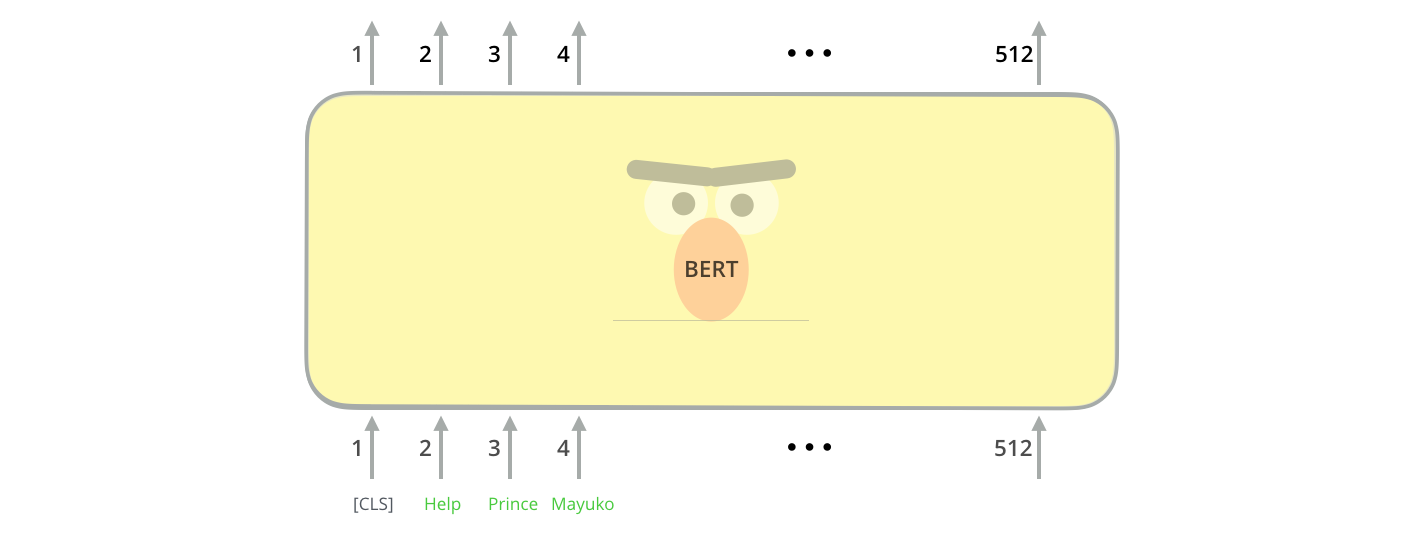

The first input token is supplied with a special \[CLS\] token for reasons that will become apparent later on. CLS here stands for Classification.

BERT与Transformer 的编码方式一样。将固定长度的字符串作为输入，数据由下而上传递计算，每一层都用到了self attention，并通过前馈神经网络传递其结果，将其交给下一个编码器。

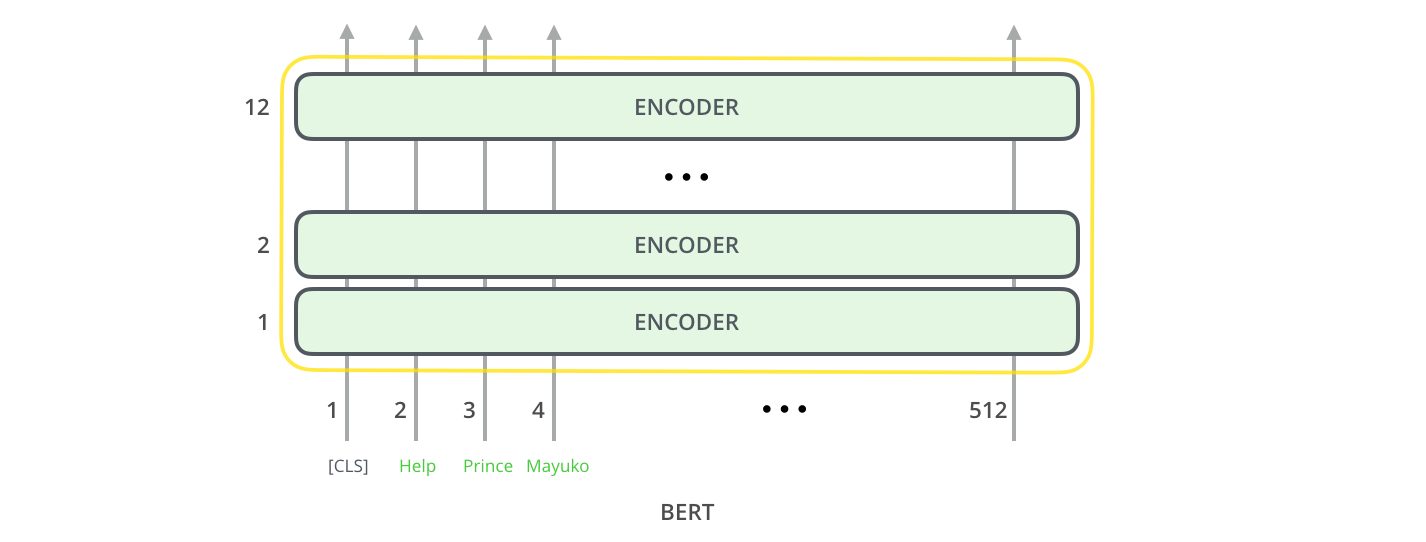

这样的架构，似乎是沿用了Transformer 的架构（除了层数，不过这是我们可以设置的参数）。那么BERT与Transformer 不同之处在哪里呢？可能在模型的输出上，我们可以发现一些端倪.

### Model Outputs

Each position outputs a vector of size hidden_size (768 in BERT Base). For the sentence classification example we’ve looked at above, we focus on the output of only the first position (that we passed the special \[CLS\] token to).

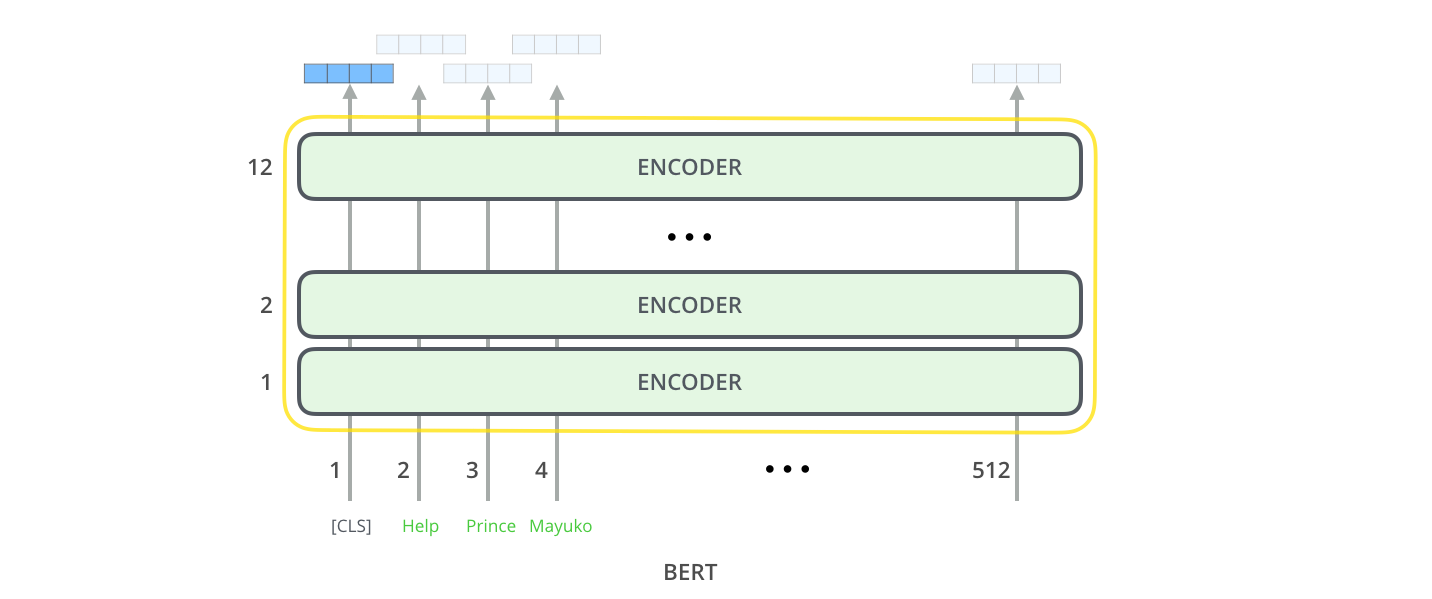

That vector can now be used as the input for a classifier of our choosing. The paper achieves great results by just using a single-layer neural network as the classifier.

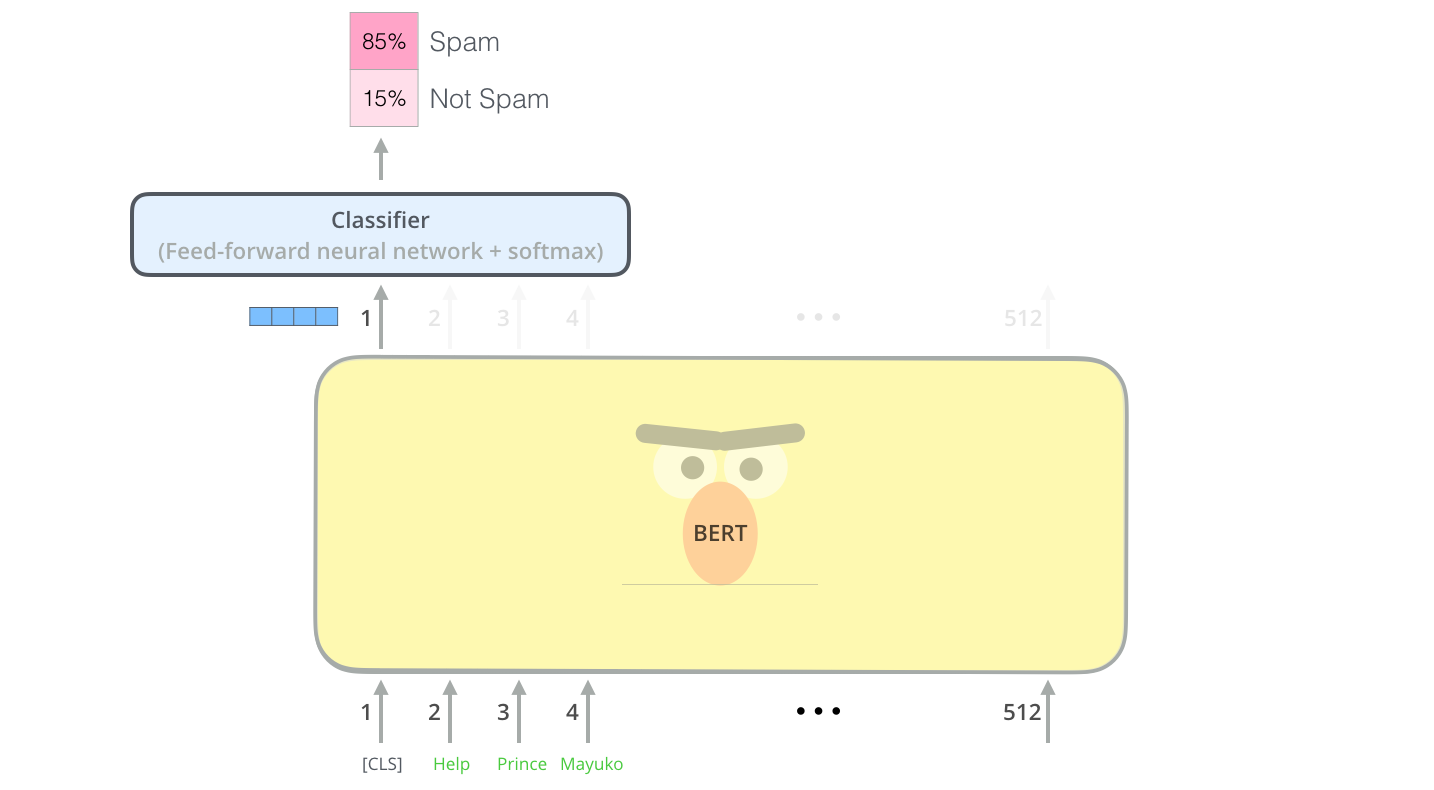

If you have more labels (for example if you’re an email service that tags emails with “spam”, “not spam”, “social”, and “promotion”), you just tweak the classifier network to have more output neurons that then pass through softmax.

### Parallels with Convolutional Nets

For those with a background in computer vision, this vector hand-off(切换) should be reminiscent of(联想) what happens between the convolution part of a network like VGGNet and the fully-connected classification portion at the end of the network.

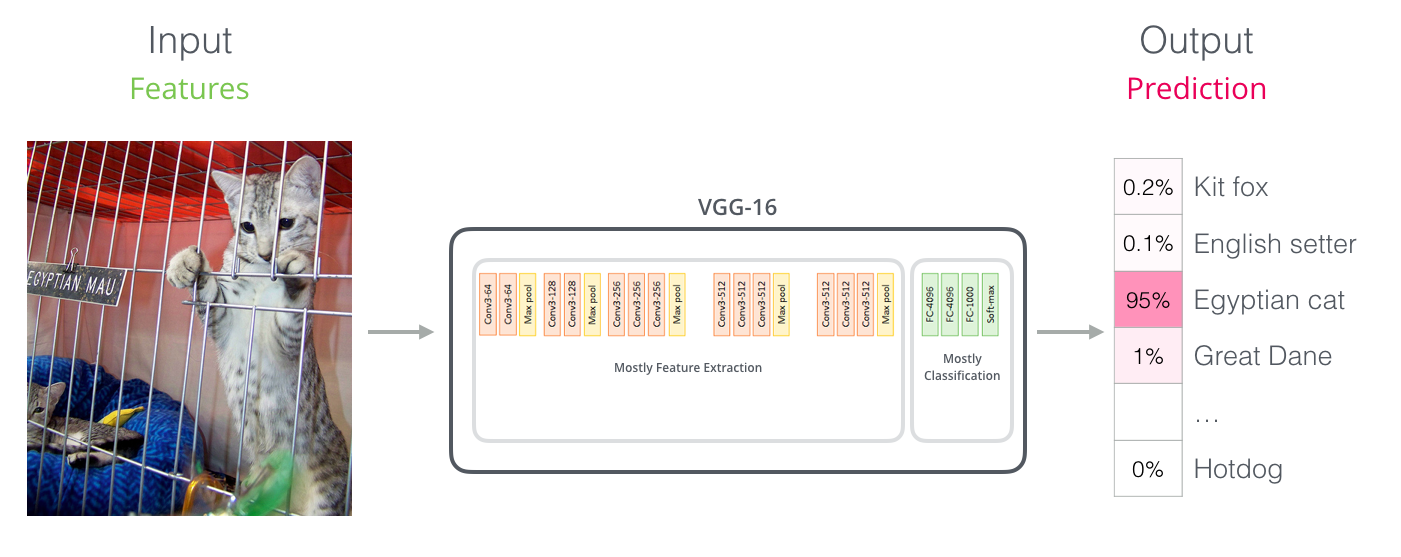

### A New Age of Embedding(词嵌入新时代)

BERT的开源随之而来的是一种词嵌入的更新。Up until now, word-embeddings have been a major force in how leading NLP models deal with language. Methods like Word2Vec and Glove have been widely used for such tasks. Let’s recap(回顾) how those are used before pointing to what has now changed.

#### Word Embedding Recap

For words to be processed by machine learning models, they need some form of numeric representation that models can use in their calculation. Word2Vec showed that we can use a vector (a list of numbers) to properly represent words in a way that captures semantic or meaning-related relationships (e.g. the ability to tell if words are similar, or opposites, or that a pair of words like “Stockholm” and “Sweden” have the same relationship between them as “Cairo” and “Egypt” have between them) as well as syntactic, or grammar-based, relationships (e.g. the relationship between “had” and “has” is the same as that between “was” and “is”).

The field quickly realized it’s a great idea to use embeddings that were pre-trained on vast amounts of text data instead of training them alongside the model(与模型一起) on what was frequently a small dataset. So it became possible to download a list of words and their embeddings generated by pre-training with Word2Vec or GloVe. This is an example of the GloVe embedding of the word “stick” (with an embedding vector size of 200)

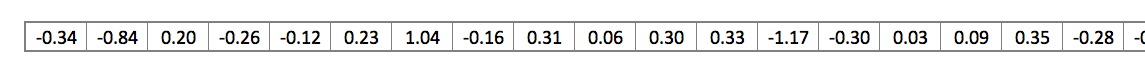

Since these are large and full of numbers, I use the following basic shape in the figures in my posts to show vectors:

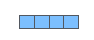

#### ELMo:Context Matters(语境问题)

上面介绍的词嵌入方式有一个很明显的问题，因为使用预训练好的词向量模型，那么无论上下文的语境关系如何，每个单词都只有一个唯一的且已经固定保存的向量化形式“。举例在中文中，'长' 这个字，在 '长度' 这个词中表示度量，在 '长高' 这个词中表示增加。那么为什么我们不通过”长'周围是度或者是高来判断它的读音或者它的语义呢？这个问题就派生出语境化的词嵌入模型。

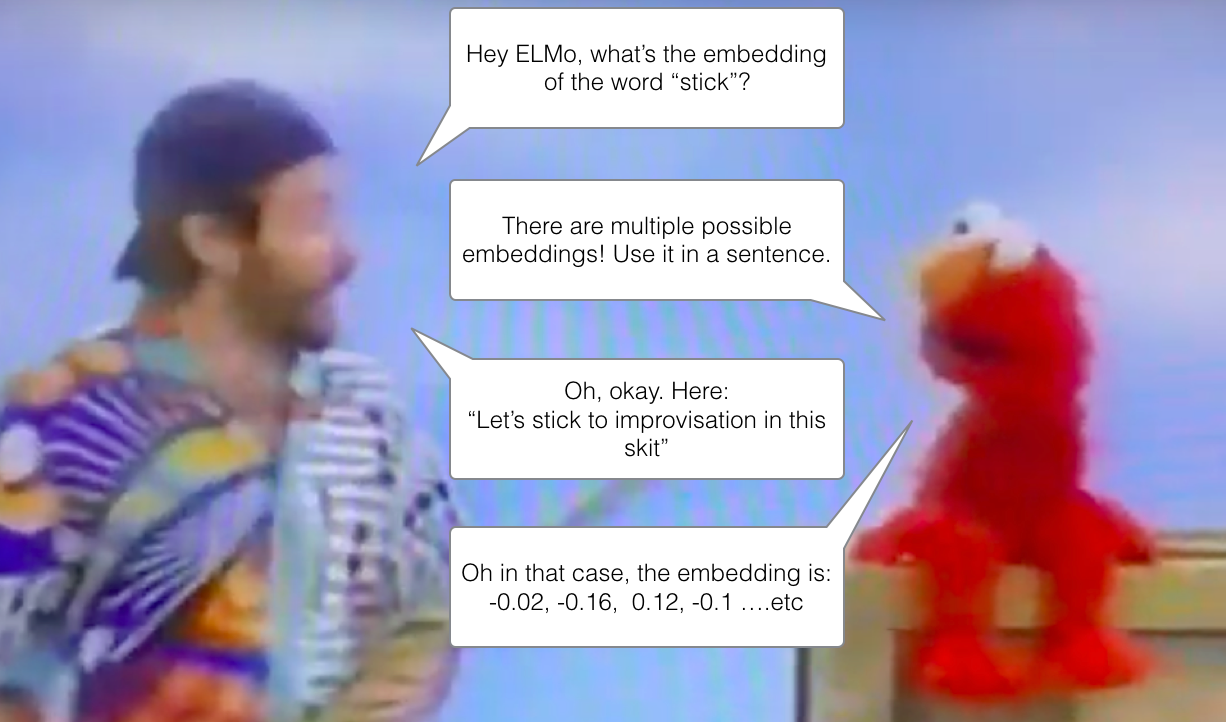

**Contextualized word-embeddings(上下文词嵌入)** can give words different embeddings based on the meaning they carry in the context of the sentence.

Instead of using a fixed embedding for each word, ELMo looks at the entire sentence before assigning each word in it an embedding. It uses a bi-directional LSTM trained on a specific task to be able to create those embeddings.

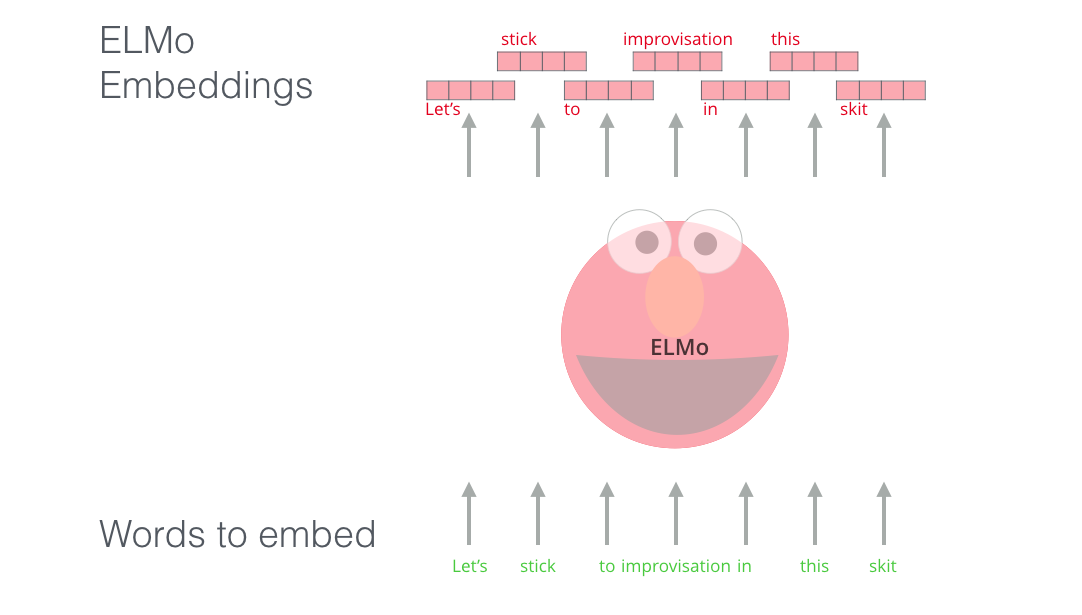

ELMo provided a significant step towards pre-training in the context of NLP. The ELMo LSTM would be trained on a massive dataset in the language of our dataset, and then we can use it as a component in other models that need to handle language.

What’s ELMo’s secret?

ELMo gained its language understanding from being trained to predict the next word in a sequence of words - a task called Language Modeling,想想输入法就是这个道理。This is convenient because we have vast amounts of text data that such a model can learn from without needing labels.

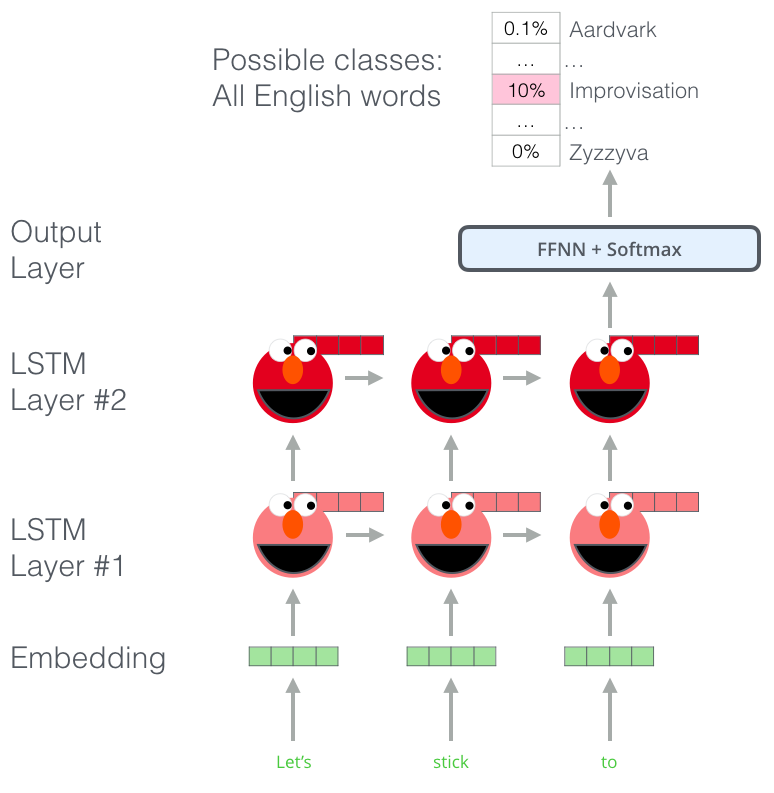

A step in the pre-training process of ELMo: Given “Let’s stick to” as input, predict the next most likely word – a language modeling task. When trained on a large dataset, the model starts to pick up on language patterns. It’s unlikely it’ll accurately guess the next word in this example. More realistically, after a word such as “hang”, it will assign a higher probability to a word like “out” (to spell “hang out”) than to “camera”.

ELMo actually goes a step further and trains a bi-directional LSTM – so that its language model doesn’t only have a sense of the next word, but also the previous word.

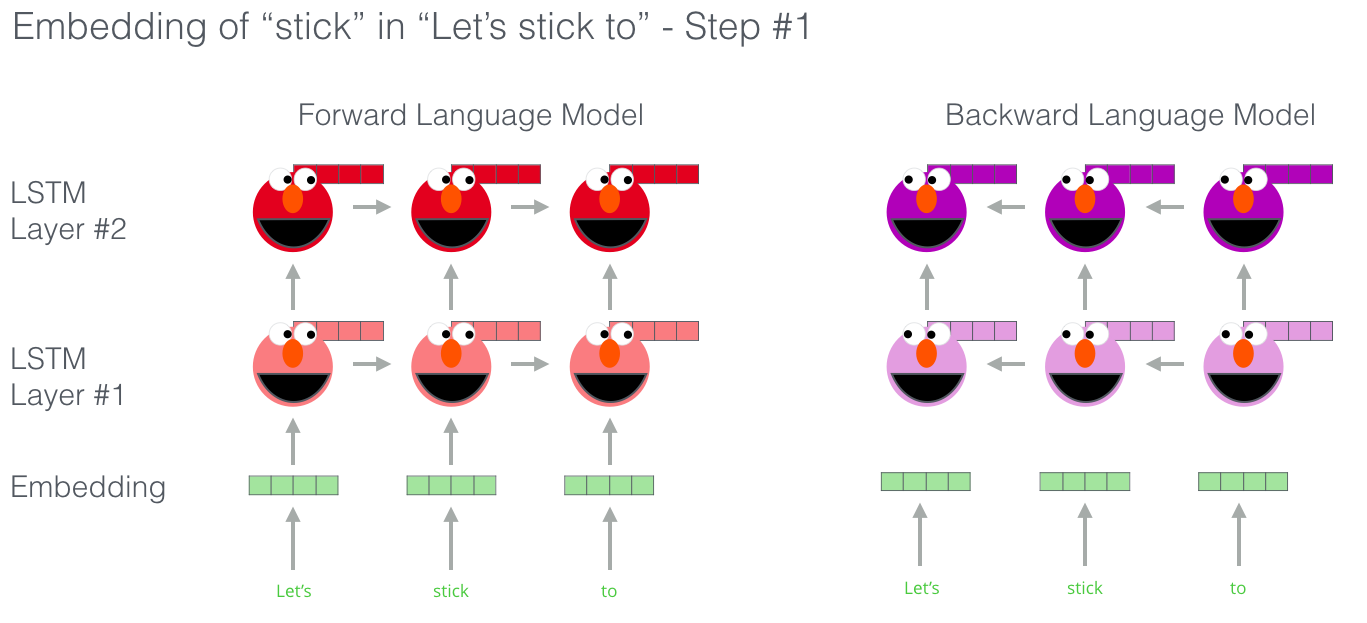

ELMo comes up with the contextualized embedding through grouping together the hidden states (and initial embedding) in a certain way (concatenation followed by weighted summation).

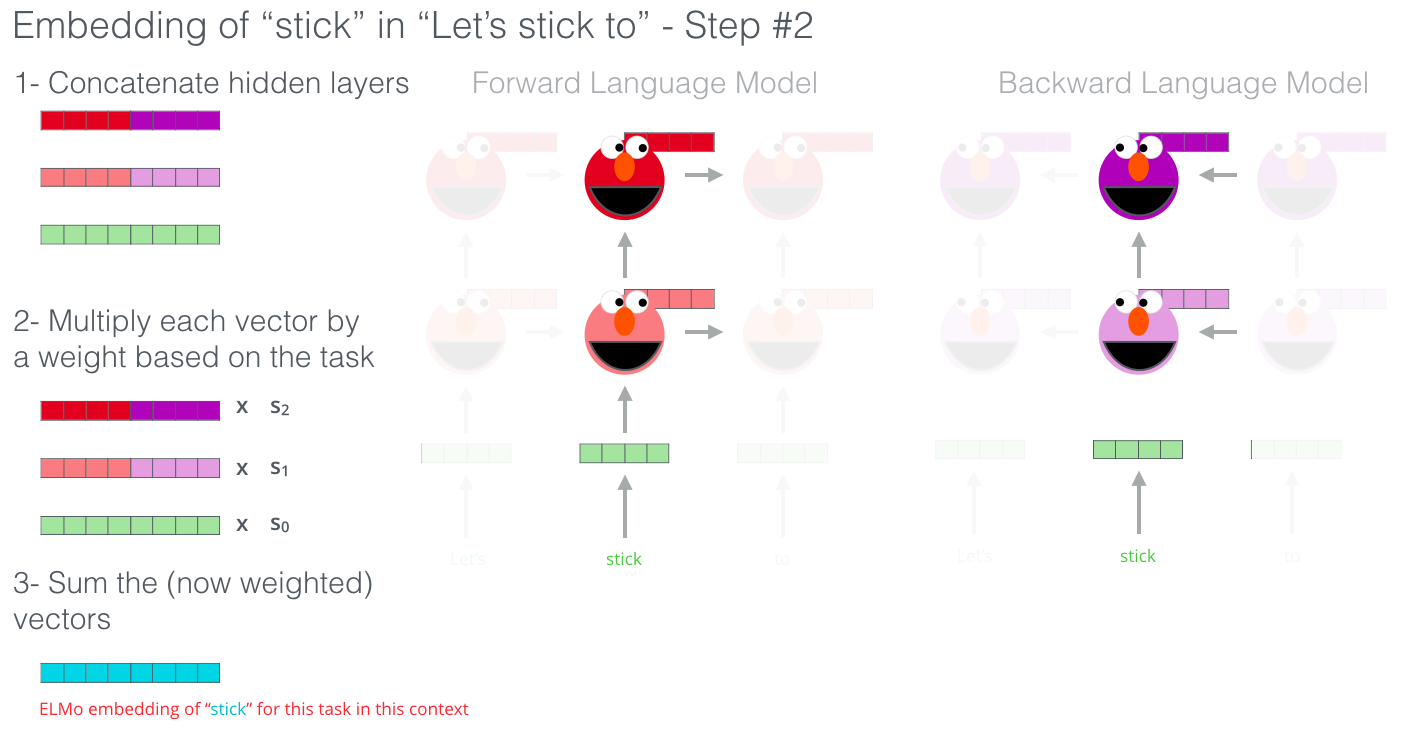

#### ULM-FiT: Nailing(钉) down Transfer Learning in NLP

ULM-FiT introduced methods to effectively utilize a lot of what the model learns during pre-training – more than(不仅仅) just embeddings, and more than(不仅仅) contextualized embeddings. ULM-FiT introduced a language model and a process to effectively fine-tune that language model for various tasks.

NLP finally had a way to do transfer learning probably as well as Computer Vision could.

#### The Transformer: Going beyond LSTMs

The release of the Transformer paper and code, and the results it achieved on tasks such as machine translation started to make some in the field think of them as a replacement to LSTMs. This was compounded(复合，合成) by the fact that Transformers deal with long-term dependancies better than LSTMs.

The Encoder-Decoder structure of the transformer made it perfect for machine translation. But how would you use it for sentence classification? How would you use it to pre-train a language model that can be fine-tuned for other tasks (downstream tasks is what the field calls those supervised-learning tasks that utilize a pre-trained model or component).

#### OpenAI Transformer: Per-training a Transformer Decoder for Language Modeling

It turns out we don’t need an entire Transformer to adopt transfer learning and a fine-tunable language model for NLP tasks. We can do with just the decoder of the transformer. The decoder is a good choice because it’s a natural choice for language modeling (predicting the next word) since it’s built to mask future tokens – a valuable feature when it’s generating a translation word by word.

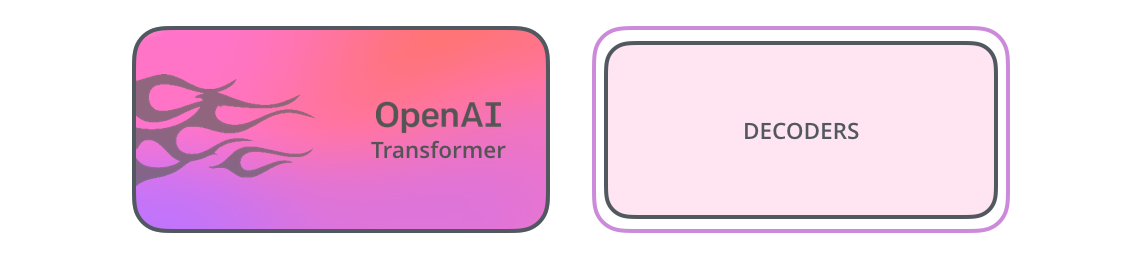

The model stacked twelve decoder layers. Since there is no encoder in this set up, these decoder layers would not have the encoder-decoder attention sublayer that vanilla transformer decoder layers have. It would still have the self-attention layer, however (masked so it doesn’t peak at future tokens).

With this structure, we can proceed to train the model on the same language modeling task: predict the next word using massive (unlabeled) datasets. Just, throw the text of 7,000 books at it and have it learn! Books are great for this sort of task since it allows the model to learn to associate related information(关联相关信息) even if they’re separated by a lot of text – something you don’t get for example, when you’re training with tweets, or articles.

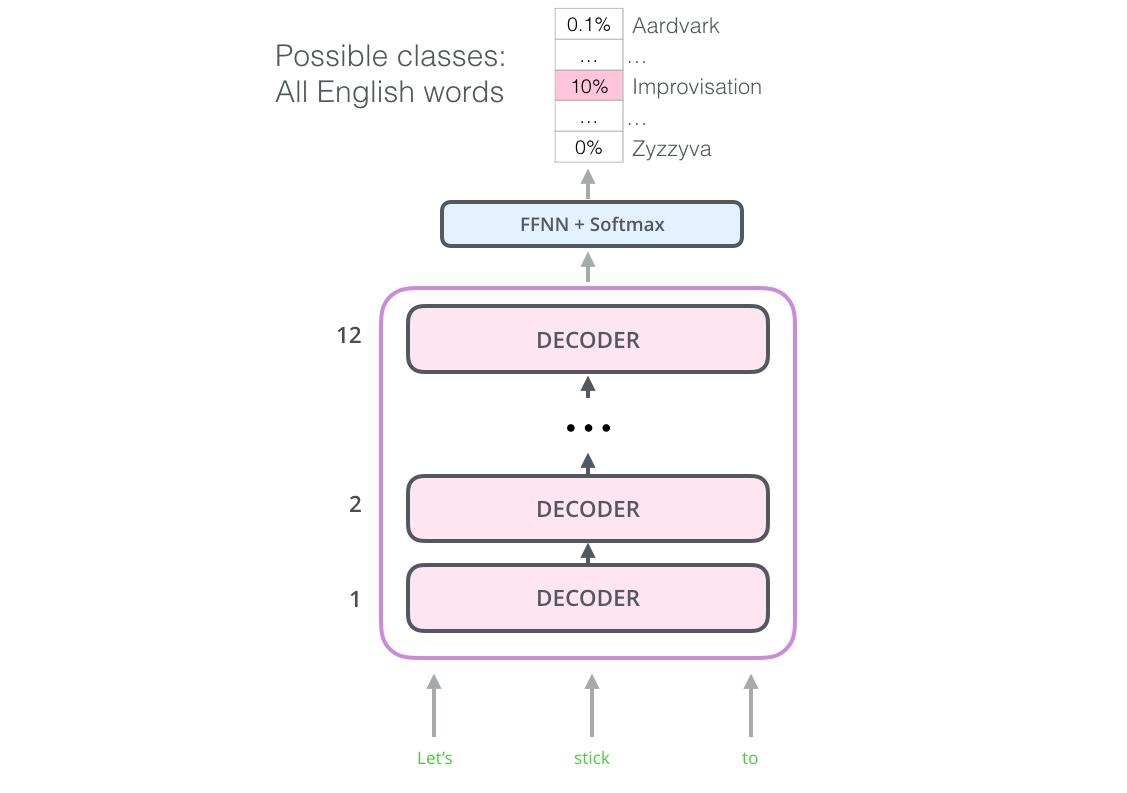

#### Transfer Learning to Downstream Tasks

Now that the OpenAI transformer is pre-trained and its layers have been tuned to reasonably handle language, we can start using it for downstream tasks. Let’s first look at sentence classification (classify an email message as “spam” or “not spam”):

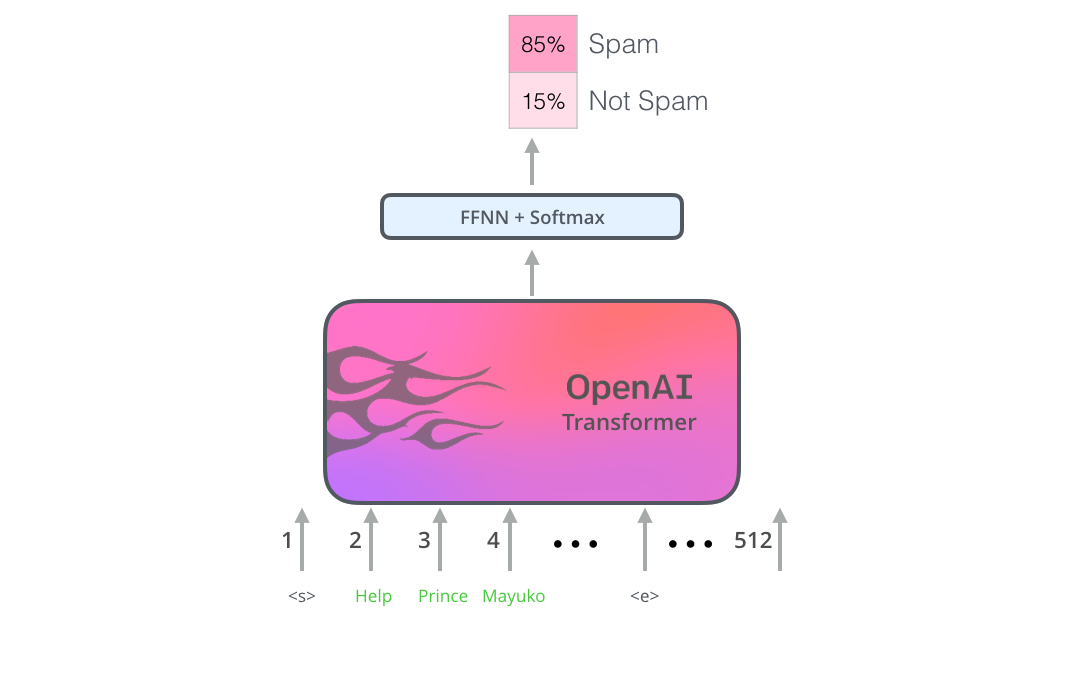